# Reduced Data Exploration

We used UMAP to reduce the dimensionality of the data. Now, we can reasonably cluster and create a classifier for the data

In [81]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import umap
import hdbscan
from collections import Counter
import seaborn as sns
import plotly.express as px 

In [84]:
primary = pd.read_csv('../data/processed/primary_reduction_neighbors_5000_components_50.csv')
primary.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,2.499264,3.454281,3.933644,3.720388,9.949039,4.162561,1.751132,5.549273,5.409541,7.537764,...,6.414557,7.278807,2.879024,7.050674,6.981003,1.279534,9.456402,0.880834,2.926465,4.416526
1,2.428059,3.518067,3.917285,3.728246,9.916289,4.133899,1.730079,5.552860,5.328186,7.569519,...,6.294168,7.236553,2.884142,6.995835,6.990696,1.249213,9.392525,0.824261,2.928497,4.397507
2,2.456584,3.489927,3.922435,3.716171,9.924487,4.145523,1.720805,5.546683,5.342722,7.544079,...,6.353340,7.241943,2.887359,7.017524,6.990367,1.254152,9.420210,0.833688,2.926959,4.404336
3,2.463783,3.482085,3.924569,3.694380,9.920242,4.184105,1.728886,5.522475,5.325371,7.430242,...,6.313893,7.246630,2.889399,7.031527,6.987337,1.256785,9.437055,0.846116,2.932260,4.410652
4,2.488055,3.473438,3.919852,3.711125,9.914275,4.140500,1.728939,5.553526,5.381145,7.570908,...,6.388325,7.259053,2.885395,7.024685,6.986077,1.263711,9.426608,0.850739,2.921905,4.405323


In [85]:
prim_umap = pd.read_csv('../data/processed/primary_reduction_neighbors_5000_components_2.csv')

In [86]:
prim_umap.head()

,0,1
0,4.067615,11.024582
1,4.081359,10.684037
2,4.024451,10.966669
3,4.026533,10.937023
4,4.076819,10.983607


Now let's run clustering on the cells

In [98]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=250, core_dist_n_jobs=1)
clusters = clusterer.fit(primary)

In [99]:
primary['label'] = clusters.labels_
prim_umap['label'] = clusters.labels_

In [100]:
colors = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

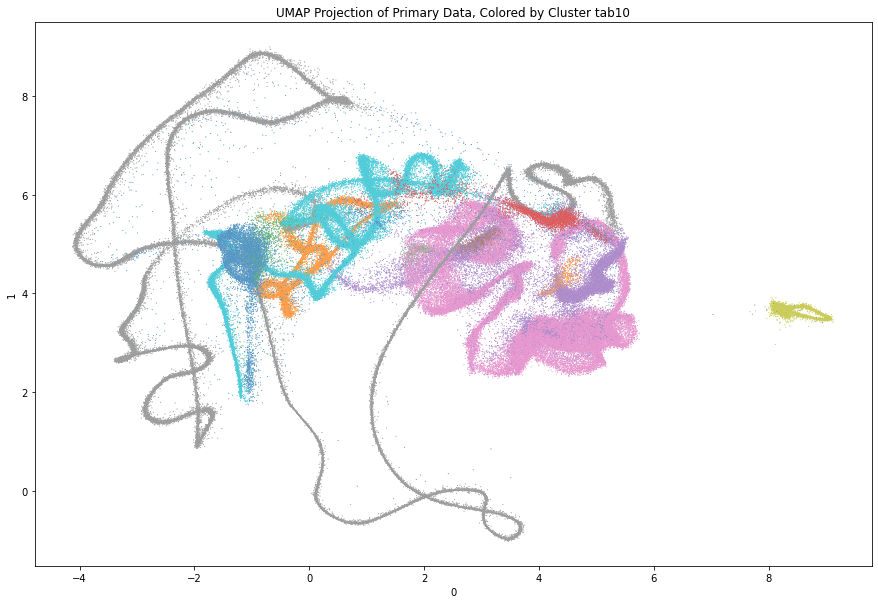

In [101]:
def two_plot(data, palette='tab10'):
    fig, ax = plt.subplots(figsize=(15, 10))

    sns.scatterplot(
        x='0', 
        y='1',
        data=data,
        hue='label',
        legend=None,
        ax=ax,
        s=1,
        palette=palette,
    )

    plt.title(f'UMAP Projection of Primary Data, Colored by Cluster {palette}')
    plt.savefig('umap_cluster.png', dpi=300)
    plt.show()

def three_plot(data):
    fig = px.scatter_3d(data, x='0', y='1', z='2', color='label')
    fig.update_traces(marker=dict(size=1))
    fig.update_layout(title='3D UMAP Projection of Primary Data, Colored by Cluster')
    fig.show()
    
two_plot(prim_umap)

In [105]:
prim_umap = pd.read_csv('../data/processed/primary_reduction_neighbors_5000_components_3.csv')
prim_umap['label'] = primary['label'].apply(lambda x: str(x))

three_plot(prim_umap[prim_umap['label'] == '7'])

In [80]:
prim_umap.to_csv('primary_labels_test.csv', index=False)

In [103]:
prim_umap['label'].value_counts()

5     52960
6     45312
8     30982
10    13837
13    13809
3      8454
9      6439
7      5821
4      3144
-1     3082
2      3014
11      960
12      776
1       444
0       375
Name: label, dtype: int64

In [78]:
prim_umap[prim_umap['label'] == '8'].index

Int64Index([176245, 176246, 176247, 176248, 176249, 176250, 176251, 176252,
            176253, 176254,
            ...
            183493, 183504, 183650, 183688, 183711, 184165, 184492, 186010,
            186051, 188985],
           dtype='int64', length=5823)

## Higher values of nearest-neighbors in UMAP

Now let's explore more UMAP data, hopefully this time capturing more global structure

In [2]:
primary = pd.read_csv('../data/processed/primary_reduction_neighbors_5000_components_2.csv')
organoid = pd.read_csv('../data/processed/organoid_reduction_neighbors_5000_components_2.csv')

In [4]:
organoid.head()

,0,1
0,0.827278,5.536598
1,-0.600387,4.877595
2,-0.716649,4.832498
3,-0.359261,5.019959
4,-0.541211,4.892551


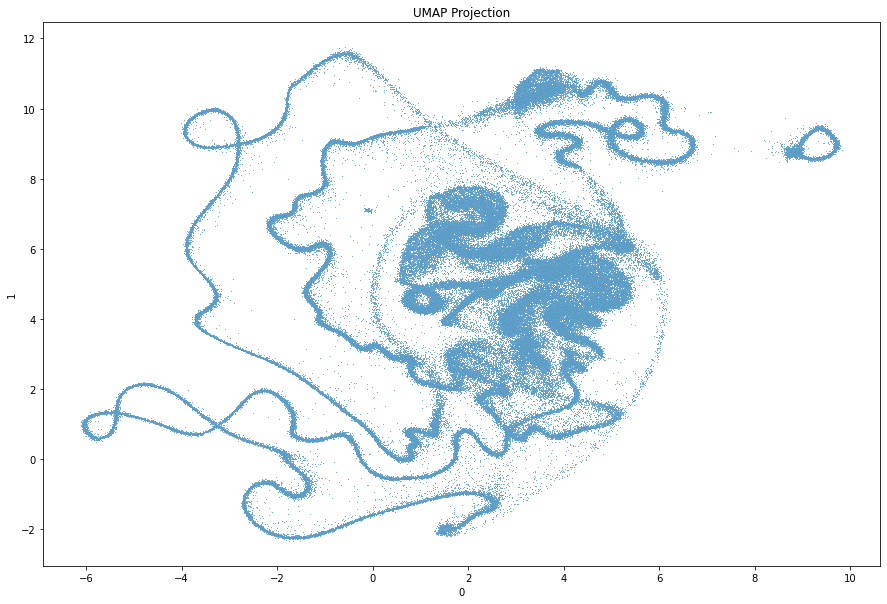

In [7]:
def two_plot(data):
    fig, ax = plt.subplots(figsize=(15, 10))

    sns.scatterplot(
        x='0', 
        y='1',
        data=data,
        legend=None,
        ax=ax,
        s=1,
        palette='bright'
    )

    plt.title(f'UMAP Projection')
    plt.savefig('umap_cluster.png', dpi=300)
    plt.show()

two_plot(primary)

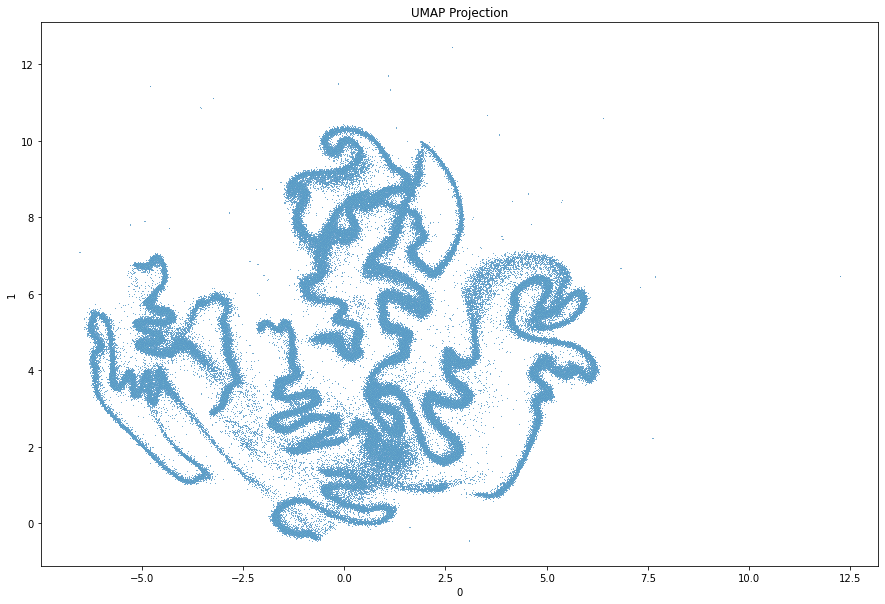

In [8]:
two_plot(organoid)